In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Accesos_tecnologia_localidad.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [12]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' no existe en el DataFrame.


In [13]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.


In [2]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   7753 non-null   object 
 1   Partido     7753 non-null   object 
 2   Localidad   7753 non-null   object 
 3   Tecnologia  7753 non-null   object 
 4   Link Indec  7753 non-null   object 
 5   Accesos     7747 non-null   float64
dtypes: float64(1), object(5)
memory usage: 363.6+ KB
None


In [15]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [16]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']

Valores únicos en 'Partido' después de los reemplazos:
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARELA'
 'F


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
           Provincia    Partido Localidad Tecnologia Link Indec       Accesos
count           7753       7753      7753       7753       7753  7.747000e+03
unique            23        432      2788         10       2671           NaN
top     BUENOS AIRES  SAN JUSTO     OTROS   WIRELESS    6427010           NaN
freq            2320        136        76       2223         89           NaN
mean             NaN        NaN       NaN        NaN        NaN  1.491688e+03
std              NaN        NaN       NaN        NaN        NaN  1.520174e+04
min              NaN        NaN       NaN        NaN        NaN  0.000000e+00
25%              NaN        NaN       NaN        NaN        NaN  3.000000e+00
50%              NaN        NaN       NaN        NaN        NaN  5.900000e+01
75%              NaN        NaN       NaN        NaN        NaN  4.005000e+02
max              NaN        NaN       NaN        NaN        NaN  1.1

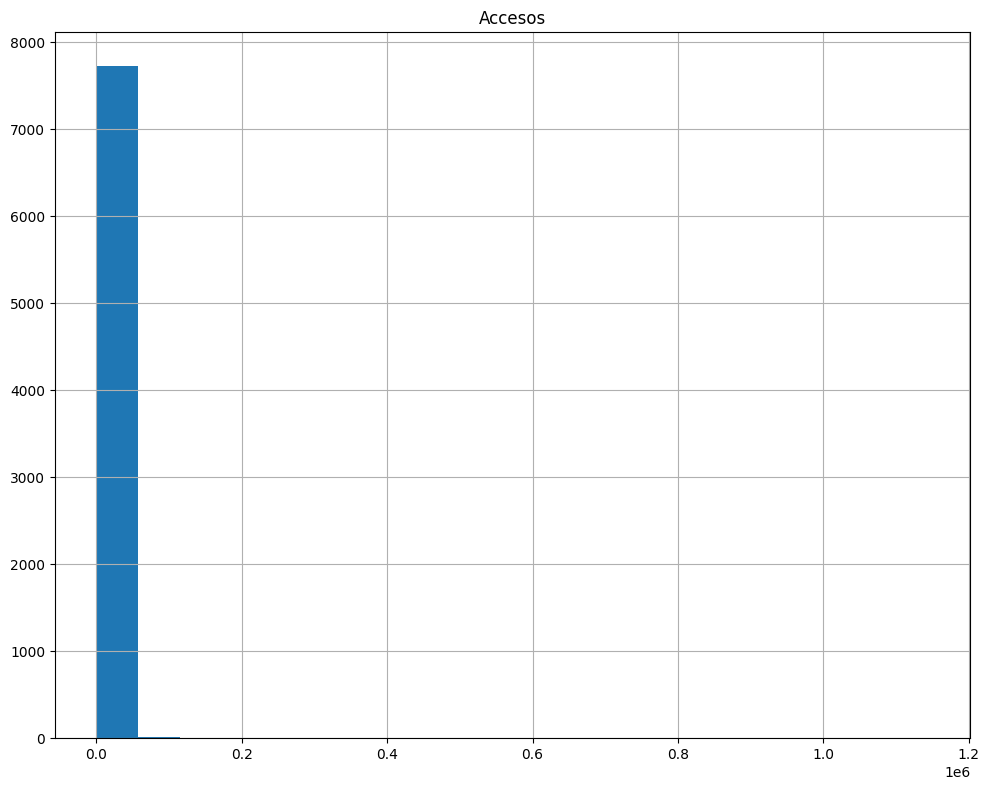

In [17]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
         Accesos
Accesos      1.0


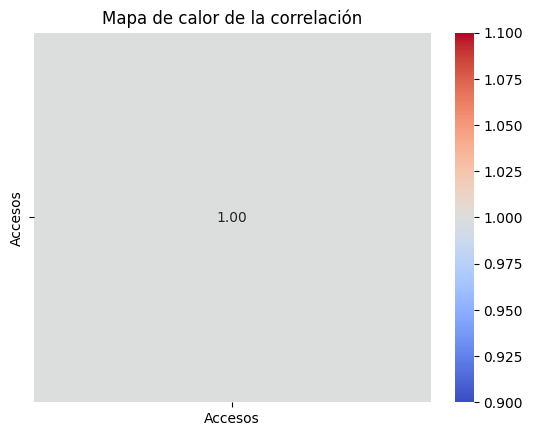

In [18]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [19]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Partido:
Partido              12 DE OCTUBRE  1º DE MAYO  2 DE ABRIL  25 DE MAYO  \
Provincia                                                                
BUENOS AIRES                     0           0           0          19   
CATAMARCA                        0           0           0           0   
CHACO                            9           7           5           5   
CHUBUT                           0           0           0           0   
CORRIENTES                       0           0           0           0   
CÓRDOBA                          0           0           0           0   
ENTRE RÍOS                       0           0           0           0   
FORMOSA                          0           0           0           0   
JUJUY                            0           0           0           0   
LA PAMPA                         0           0           0           0   
LA RIOJA                         0           0           0     

Tabla de contingencia entre Provincia y Partido:
Partido              12 DE OCTUBRE  1º DE MAYO  2 DE ABRIL  25 DE MAYO  \
Provincia                                                                
BUENOS AIRES                     0           0           0          19   
CATAMARCA                        0           0           0           0   
CHACO                            9           7           5           5   
CHUBUT                           0           0           0           0   
CORRIENTES                       0           0           0           0   
CÓRDOBA                          0           0           0           0   
ENTRE RÍOS                       0           0           0           0   
FORMOSA                          0           0           0           0   
JUJUY                            0           0           0           0   
LA PAMPA                         0           0           0           0   
LA RIOJA                         0           0           0     

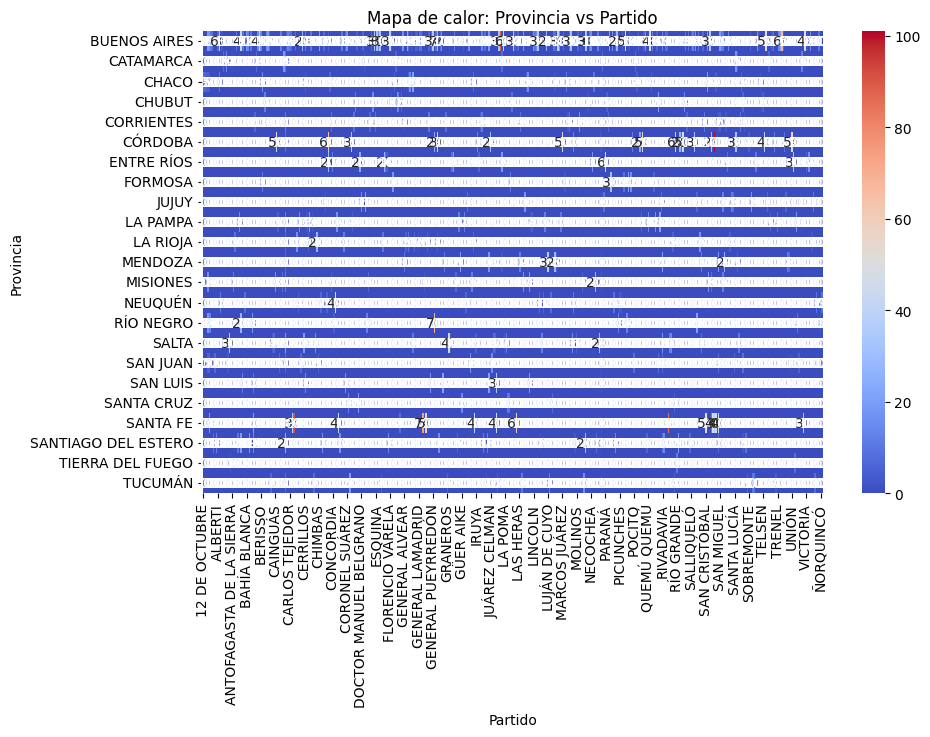

Tabla de contingencia entre Provincia y Localidad:
Localidad            11 DE OCTUBRE  11 DE SEPTIEMBRE  12 DE OCTUBRE  \
Provincia                                                             
BUENOS AIRES                     0                 4              1   
CATAMARCA                        0                 0              0   
CHACO                            0                 0              0   
CHUBUT                           0                 0              0   
CORRIENTES                       0                 0              0   
CÓRDOBA                          0                 0              0   
ENTRE RÍOS                       0                 0              0   
FORMOSA                          0                 0              0   
JUJUY                            0                 0              0   
LA PAMPA                         0                 0              0   
LA RIOJA                         0                 0              0   
MENDOZA                   

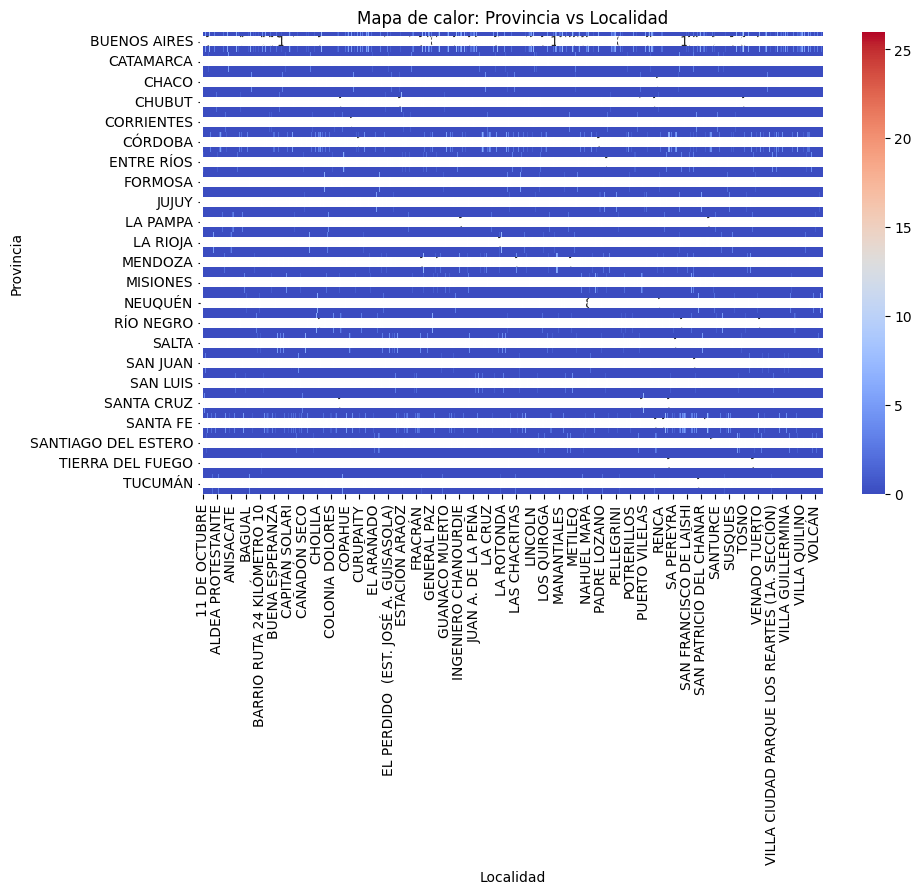

Tabla de contingencia entre Provincia y Tecnologia:
Tecnologia           ADSL  CABLEMODEM  Cablemodem  DIAL UP  FIBRA OPTICA  \
Provincia                                                                  
BUENOS AIRES          355         343           6      235           489   
CATAMARCA              14           3           0        1            30   
CHACO                  29          17           0        1            49   
CHUBUT                 14          10           0       14            14   
CORRIENTES             21          10           0        1            23   
CÓRDOBA               176          87           0        4           183   
ENTRE RÍOS             46          37           0        5            52   
FORMOSA                13           3           0        0            16   
JUJUY                  19          16           0        0            50   
LA PAMPA               12          18           0       13            52   
LA RIOJA               10          2

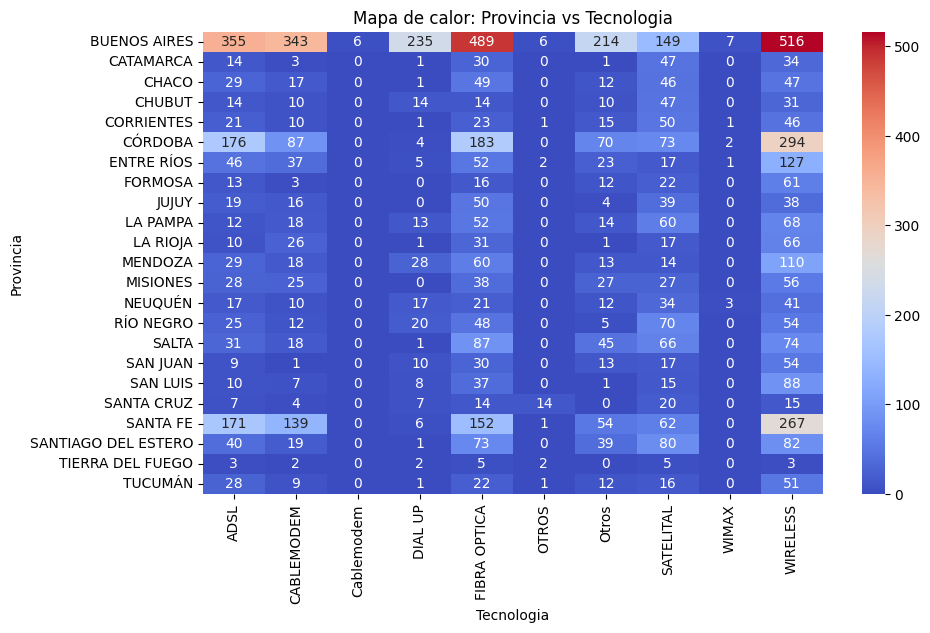

Tabla de contingencia entre Provincia y Link Indec:
Link Indec           10007030  10007040  10007060  10007070  10007100  \
Provincia                                                               
BUENOS AIRES                0         0         0         0         0   
CATAMARCA                   1         2         1         1         1   
CHACO                       0         0         0         0         0   
CHUBUT                      0         0         0         0         0   
CORRIENTES                  0         0         0         0         0   
CÓRDOBA                     0         0         0         0         0   
ENTRE RÍOS                  0         0         0         0         0   
FORMOSA                     0         0         0         0         0   
JUJUY                       0         0         0         0         0   
LA PAMPA                    0         0         0         0         0   
LA RIOJA                    0         0         0         0         0   

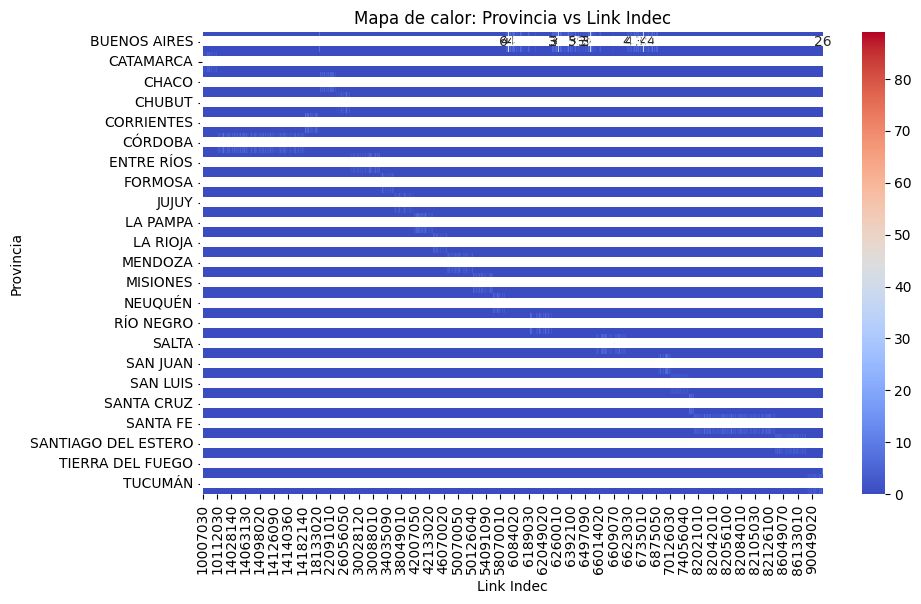

Tabla de contingencia entre Partido y Provincia:
Provincia      BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Partido                                                                      
12 DE OCTUBRE             0          0      9       0           0        0   
1º DE MAYO                0          0      7       0           0        0   
2 DE ABRIL                0          0      5       0           0        0   
25 DE MAYO               19          0      5       0           0        0   
9 DE JULIO               17          0      3       0           0        0   
...                     ...        ...    ...     ...         ...      ...   
ZAPALA                    0          0      0       0           0        0   
ZONDA                     0          0      0       0           0        0   
ZÁRATE                   10          0      0       0           0        0   
ÑORQUINCÓ                 0          0      0       0           0        0   
ÑORQUÍN        

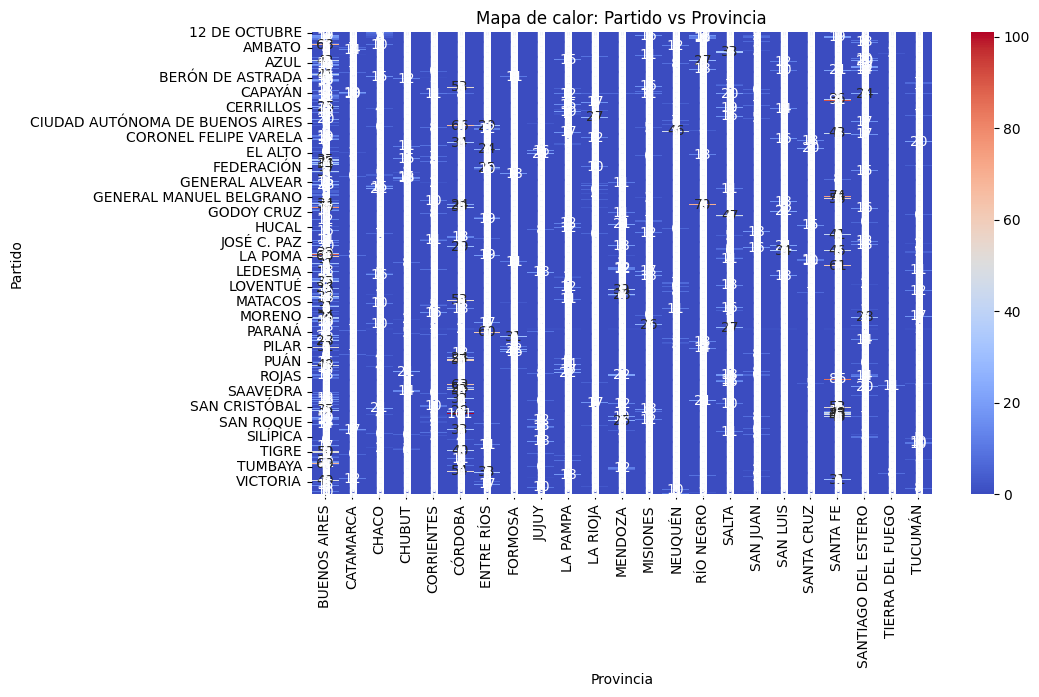

Tabla de contingencia entre Partido y Localidad:
Localidad      11 DE OCTUBRE  11 DE SEPTIEMBRE  12 DE OCTUBRE  1º DE MAYO  \
Partido                                                                     
12 DE OCTUBRE              0                 0              0           0   
1º DE MAYO                 0                 0              0           0   
2 DE ABRIL                 0                 0              0           0   
25 DE MAYO                 0                 0              0           0   
9 DE JULIO                 0                 0              1           0   
...                      ...               ...            ...         ...   
ZAPALA                     0                 0              0           0   
ZONDA                      0                 0              0           0   
ZÁRATE                     0                 0              0           0   
ÑORQUINCÓ                  0                 0              0           0   
ÑORQUÍN                    

KeyboardInterrupt: 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [21]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
      Accesos
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
7748      NaN
7749      NaN
7750      NaN
7751      NaN
7752      NaN

[7753 rows x 1 columns]


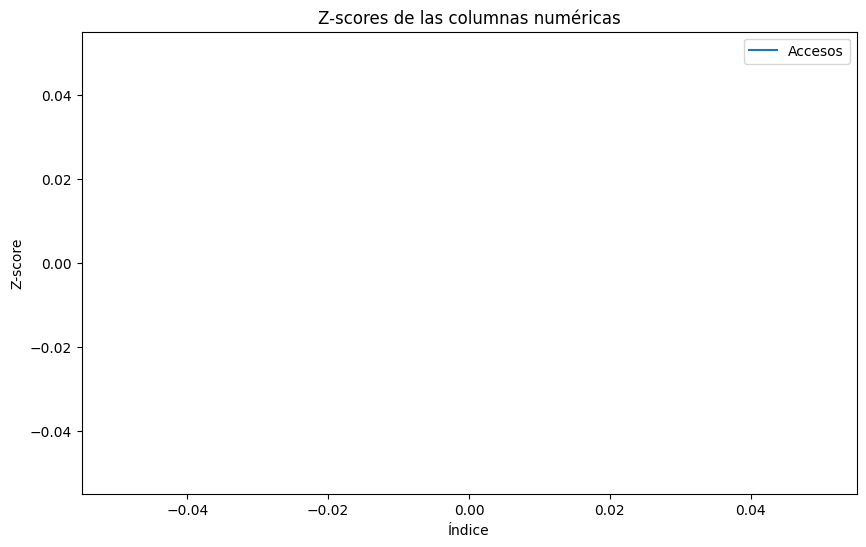

In [22]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [23]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           2320
CÓRDOBA                 889
SANTA FE                852
SANTIAGO DEL ESTERO     334
SALTA                   322
ENTRE RÍOS              310
MENDOZA                 272
LA PAMPA                237
RÍO NEGRO               234
MISIONES                201
CHACO                   201
CORRIENTES              168
JUJUY                   166
SAN LUIS                166
NEUQUÉN                 155
LA RIOJA                152
CHUBUT                  140
TUCUMÁN                 140
SAN JUAN                134
CATAMARCA               130
FORMOSA                 127
SANTA CRUZ               81
TIERRA DEL FUEGO         22
Name: count, dtype: int64

Conteo de categorías en la columna 'Partido':
Partido
SAN JUSTO                   136
CAPITAL                     124
GENERAL SAN MARTÍN          118
COLÓN                       100
GENERAL ROCA                 94
                           ... 
ANTOFAGASTA DE LA SIERRA

In [24]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


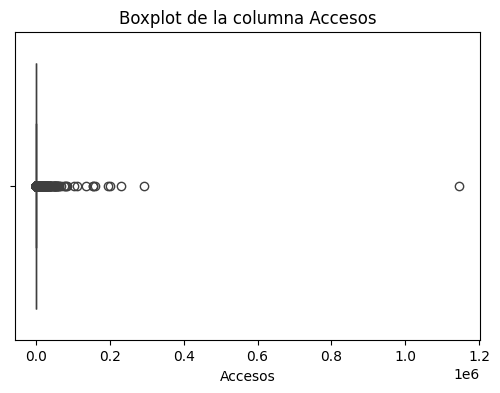

In [25]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [26]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64


In [27]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [28]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [29]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [30]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64


In [31]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Accesos_tecnologia_localidad.csv


In [32]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Accesos    57.646562
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Accesos    4168.047185
dtype: float64


In [33]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
  Variable       VIF
0    const  1.009637
1  Accesos  1.000000


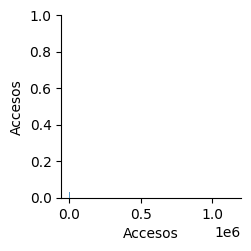

In [34]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [35]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                    Accesos                                                \
                      count         mean           std  min    25%    50%   
Provincia                                                                   
BUENOS AIRES         2320.0  2781.456466  25317.271522  0.0   7.00  109.5   
CATAMARCA             130.0   577.492308   4420.528525  1.0   1.00    5.5   
CHACO                 201.0   731.800995   4512.900189  1.0   3.00   57.0   
CHUBUT                140.0  1244.450000   3951.664333  1.0   1.00   21.0   
CORRIENTES            167.0   936.976048   5618.986884  0.0   1.00   10.0   
CÓRDOBA               889.0  1221.343082  12125.675237  1.0   8.00   81.0   
ENTRE RÍOS            309.0   952.462783   5066.818243  0.0  15.00   93.0   
FORMOSA               127.0   495.669291   2131.095646  0.0   3.00   31.0   
JUJUY                 166.0   720.987952   4557.098180  1.0   3.00   10.0   
LA PAMPA              237.0   520.09

In [36]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Provincia':
                         Accesos
Provincia                       
BUENOS AIRES         2781.456466
CATAMARCA             577.492308
CHACO                 731.800995
CHUBUT               1244.450000
CORRIENTES            936.976048
CÓRDOBA              1221.343082
ENTRE RÍOS            952.462783
FORMOSA               495.669291
JUJUY                 720.987952
LA PAMPA              520.097046
LA RIOJA              575.532895
MENDOZA              1109.018382
MISIONES             1027.631841
NEUQUÉN              1055.109677
RÍO NEGRO             735.217949
SALTA                 631.163009
SAN JUAN              790.970149
SAN LUIS              949.451807
SANTA CRUZ           1030.382716
SANTA FE             1092.691315
SANTIAGO DEL ESTERO   376.318318
TIERRA DEL FUEGO     2791.318182
TUCUMÁN              1906.528571


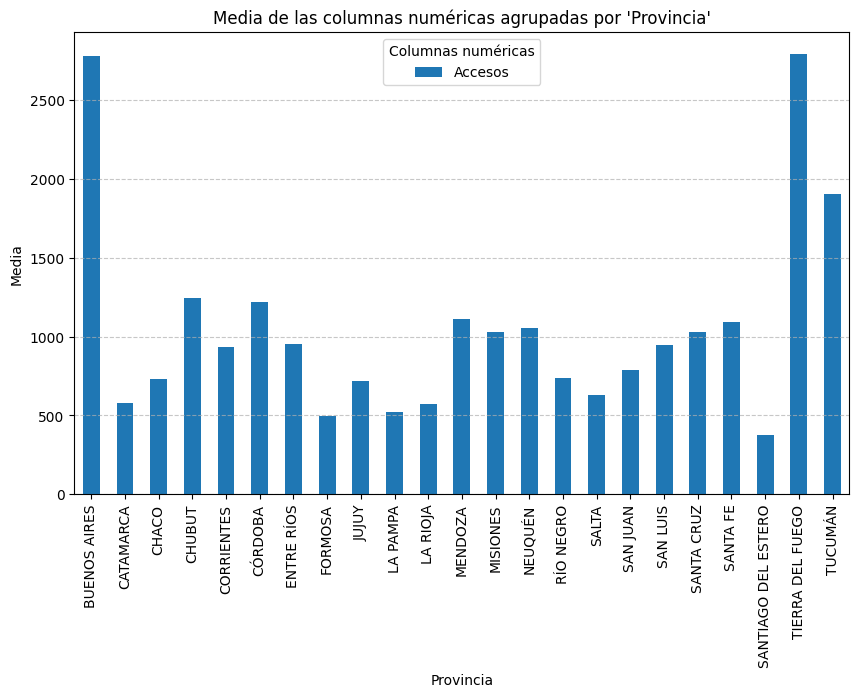


Estadísticas por grupo de 'Partido':
                   Accesos
Partido                   
12 DE OCTUBRE   105.666667
1º DE MAYO      101.857143
2 DE ABRIL      160.600000
25 DE MAYO      232.555556
9 DE JULIO      384.368421
...                    ...
ZAPALA          633.300000
ZONDA           386.000000
ZÁRATE         3215.300000
ÑORQUINCÓ         3.333333
ÑORQUÍN          68.333333

[432 rows x 1 columns]


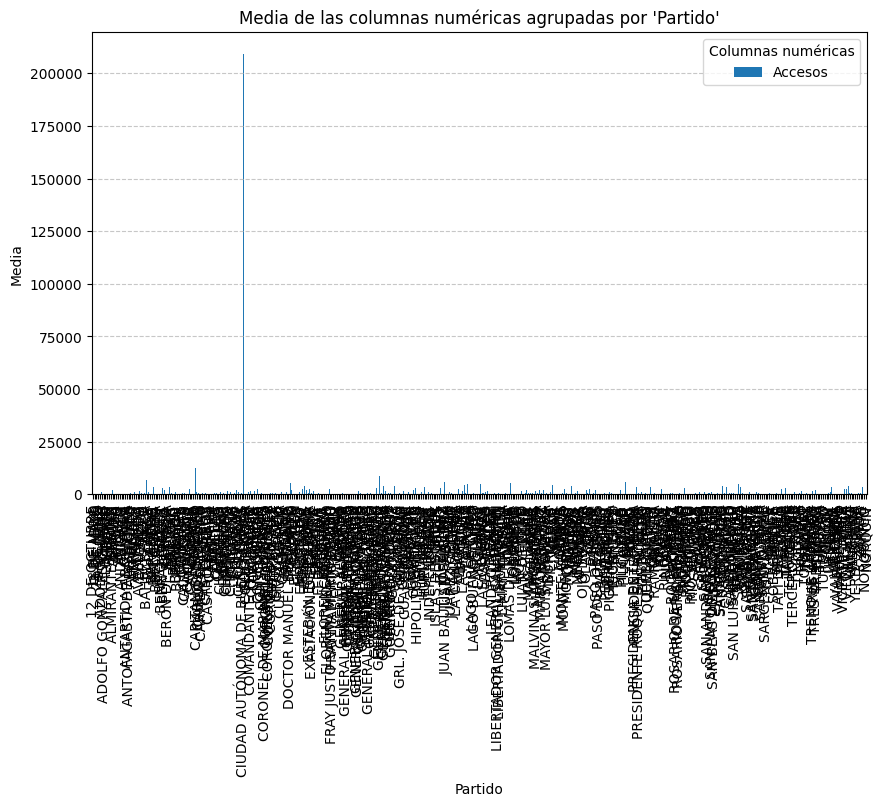


Estadísticas por grupo de 'Localidad':
                  Accesos
Localidad                
11 DE OCTUBRE      225.00
11 DE SEPTIEMBRE   324.75
12 DE OCTUBRE       19.00
1º DE MAYO         139.00
20 DE JUNIO        373.00
...                   ...
ZÁRATE            5195.50
ÁLVAREZ            383.00
ÁRRAGA              21.75
ÑANDUCITA           37.00
ÑORQUINCÓ            7.00

[2788 rows x 1 columns]


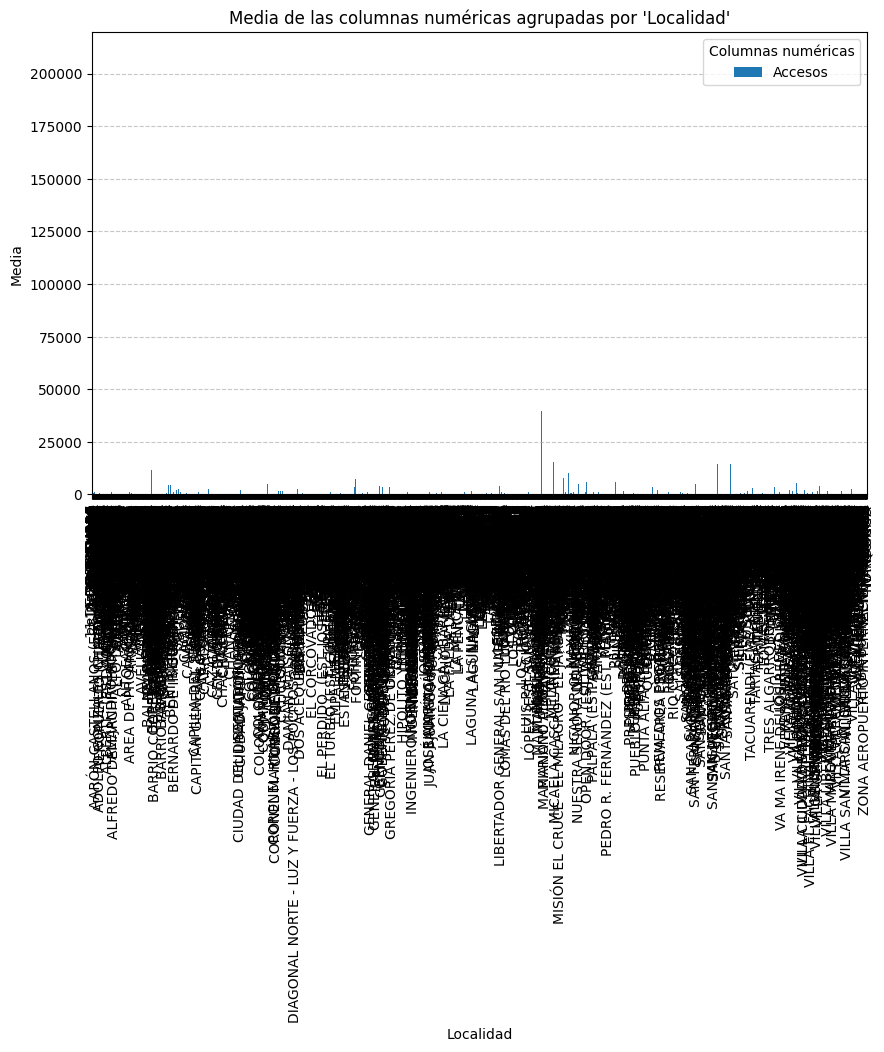


Estadísticas por grupo de 'Tecnologia':
                   Accesos
Tecnologia                
ADSL            662.593496
CABLEMODEM     6792.461631
Cablemodem    33765.166667
DIAL UP          31.364362
FIBRA OPTICA   2645.912437
OTROS          1322.666667
Otros           235.675127
SATELITAL         2.950655
WIMAX           159.857143
WIRELESS        266.845254


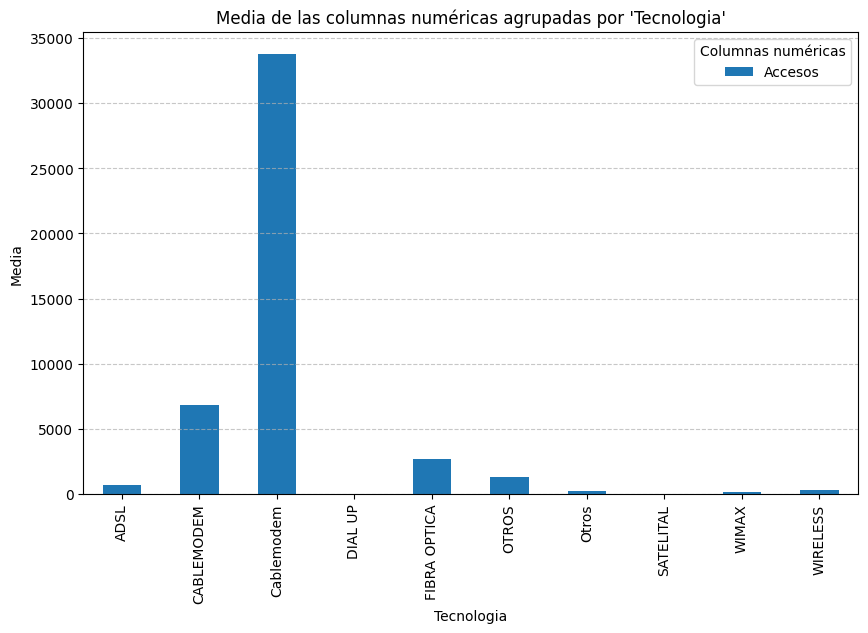


Estadísticas por grupo de 'Link Indec':
                Accesos
Link Indec             
10007030       1.000000
10007040      76.500000
10007060       5.000000
10007070       1.000000
10007100      66.000000
...                 ...
94007010    4686.571429
94007020      80.000000
94014010       1.000000
94014020    4039.857143
Sin Datos    570.654321

[2671 rows x 1 columns]


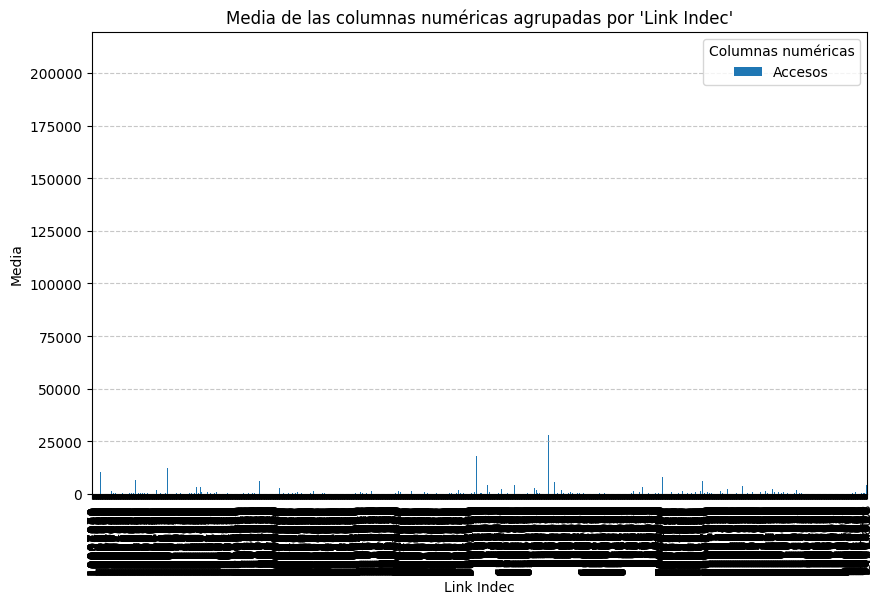

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
# Generar el contenido del README
readme_content = """
# Análisis de Datos con Pandas y Visualización

Este Jupyter Notebook realiza un análisis exhaustivo de un conjunto de datos utilizando `pandas` para la manipulación de datos y `seaborn` y `matplotlib` para la visualización.

## Contenido del Notebook

1. **Carga y Normalización de Datos**
    - Carga de un archivo CSV y normalización de nombres de columnas.
    - Verificación y conversión de tipos de datos.

2. **Reemplazo de Variaciones Específicas**
    - Reemplazo de variaciones específicas en las columnas `Provincia`, `Partido` y `Localidad`.

3. **Estadísticas Descriptivas y Análisis Exploratorio**
    - Generación de estadísticas descriptivas.
    - Visualización de histogramas y mapas de calor de correlación.

4. **Análisis de Correlación**
    - Cálculo y visualización de la matriz de correlación para columnas numéricas.
    - Tablas de contingencia y mapas de calor para columnas categóricas.

5. **Cálculo de Z-scores**
    - Cálculo y visualización de Z-scores para columnas numéricas.

6. **Análisis de Valores Negativos**
    - Identificación y reemplazo de valores negativos por NaN.
    - Visualización de distribuciones y conteo de valores negativos.

7. **Análisis de Distribuciones**
    - Cálculo de skewness (asimetría) y kurtosis (curtosis) para columnas numéricas.

8. **Verificación de Multicolinealidad**
    - Cálculo del Factor de Inflación de la Varianza (VIF) para detectar multicolinealidad.

9. **Visualización de Relaciones entre Variables**
    - Visualización de relaciones entre variables numéricas utilizando pairplot.

10. **Agrupamiento por Categorías**
     - Cálculo y visualización de estadísticas agrupadas por columnas categóricas.

11. **Verificación de Duplicados**
     - Conteo de filas duplicadas en el DataFrame.

## Requisitos

- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scipy`
- `statsmodels`

## Uso

Para ejecutar este notebook, asegúrate de tener instaladas las bibliotecas necesarias y de tener el archivo CSV en la ruta especificada.


In [ ]:
```markdown
## Observaciones y Conclusiones

### Observaciones

1. **Calidad de los Datos**:
    - Se encontraron y reemplazaron valores negativos en varias columnas numéricas, lo que sugiere posibles errores en la entrada de datos.
    - Se identificaron y reemplazaron variaciones en los nombres de provincias, partidos y localidades para asegurar la consistencia en los datos.

2. **Distribuciones y Estadísticas**:
    - Las distribuciones de varias columnas numéricas mostraron asimetría (skewness) y curtosis (kurtosis) significativas, lo que indica la presencia de valores atípicos o distribuciones no normales.
    - Las estadísticas descriptivas proporcionaron una visión general de las características de los datos, incluyendo medias, medianas y desviaciones estándar.

3. **Correlaciones**:
    - La matriz de correlación y los mapas de calor revelaron relaciones significativas entre algunas variables numéricas.
    - Las tablas de contingencia y los mapas de calor para columnas categóricas ayudaron a identificar patrones y relaciones entre variables categóricas.

4. **Multicolinealidad**:
    - El análisis del Factor de Inflación de la Varianza (VIF) indicó la presencia de multicolinealidad entre algunas variables numéricas, lo que puede afectar los modelos predictivos.

### Conclusiones

1. **Limpieza y Preparación de Datos**:
    - La limpieza y normalización de los datos son pasos cruciales para asegurar la calidad y consistencia de los análisis posteriores.
    - Reemplazar valores negativos y manejar valores atípicos son prácticas esenciales para obtener resultados más precisos y fiables.

2. **Análisis Exploratorio**:
    - El análisis exploratorio de datos (EDA) proporciona una comprensión profunda de las características y relaciones en el conjunto de datos, lo que es fundamental para la toma de decisiones informadas.
    - Visualizaciones como histogramas, mapas de calor y gráficos de caja son herramientas efectivas para identificar patrones, tendencias y anomalías en los datos.

3. **Modelado y Predicción**:
    - La identificación de multicolinealidad y la comprensión de las relaciones entre variables son pasos importantes para construir modelos predictivos robustos.
    - Es necesario considerar técnicas adicionales para manejar la multicolinealidad y mejorar la precisión de los modelos.

Este análisis proporciona una base sólida para futuras investigaciones y aplicaciones, incluyendo la construcción de modelos predictivos y la toma de decisiones basada en datos.
```